In [1]:
# import of standard python libraries
import numpy as np
import numpy.linalg as lin
import pandas as pd
import pickle
import argparse

from sklearn.linear_model import ridge_regression
import matplotlib.pyplot as plt

from utils_convex import *

In [2]:
# REAL DATA
#the name of the dataset which you wish to run
# filename="diabetes"
# filename="breastcancer"
# X,y = data_loader(filename=filename)

#SYNTHETIC DATA
n = 100
n_test = 1000
d = 10
alpha = 0.1
sigma = 0.1

Sigma = alpha*np.ones((d,d)) + (1-alpha)*np.eye(d)
theta_star = np.ones(d)

X = np.random.multivariate_normal(np.zeros(d), Sigma, n)
y = X@theta_star + sigma*np.random.randn(n)

X_test = np.random.multivariate_normal(np.zeros(d), Sigma, n_test)
y_test = X_test@theta_star + sigma*np.random.randn(n_test)



#Regularization parameter
lambda_reg = 1e-4

#Smoothness parameter
n=X.shape[0]

H = (X.T@X)/n + lambda_reg* np.eye(len(X[0]))
L = np.linalg.norm(H, axis=(0,1) , ord=2)
print(L)
#Calculation of the optimal solutions
theta_star_2, Loss_star = linear_regression(X, y, lambda_reg)

#Choose the number of executions for the algorithm to calculate means and variances
executions = 3
T = 100000
eta = 0.2

2.4981519554308718


In [3]:
#Run and Evaluate GD
Gdruns = []
Gdruns_test = []
for i in range(executions):
  Gd,Gd_Losses,Gd_Losses_test,Gd_FOs = GD(X, y, np.zeros_like(X[0]), eta/(L), T//n, lambda_reg, X_test, y_test)
  Gdruns.append(Gd_Losses)
  Gdruns_test.append(Gd_Losses_test)

print(Gdruns[0][-1], Loss_star)

0.009394478047753622 0.009394478047753603


In [4]:
#Run and Evaluate SGD
Sgdruns = []
Sgdruns_test = []
for i in range(executions):
  Sgd,Sgd_Losses,Sgd_Losses_test,Sgd_FOs = SGD(X, y, np.zeros_like(X[0]), eta/(L), T, lambda_reg, X_test, y_test)
  Sgdruns.append(Sgd_Losses)
  Sgdruns_test.append(Sgd_Losses_test)

print(Sgdruns[0][-1], Loss_star)

0.009395265552580065 0.009394478047753603


In [5]:
#Run and Evaluate SVRG
SVRGruns = []
SVRGruns_test = []
for i in range(executions):
  print(T//(2*n), 2*n)
  SVRG_theta,SVRG_Losses,SVRG_Losses_test,SVRG_FOs = SVRG(X, y, np.zeros_like(X[0]), eta/L, T//(12*n), 5*n, lambda_reg, X_test, y_test)
  SVRGruns.append(SVRG_Losses)
  SVRGruns_test.append(SVRG_Losses_test)
print(SVRGruns[0][-1], Loss_star)

500 200
500 200
500 200
0.009394478047753596 0.009394478047753603


100000 100000


Text(0, 0.5, '$\\log(L(\\theta) - L^{\\star})$')

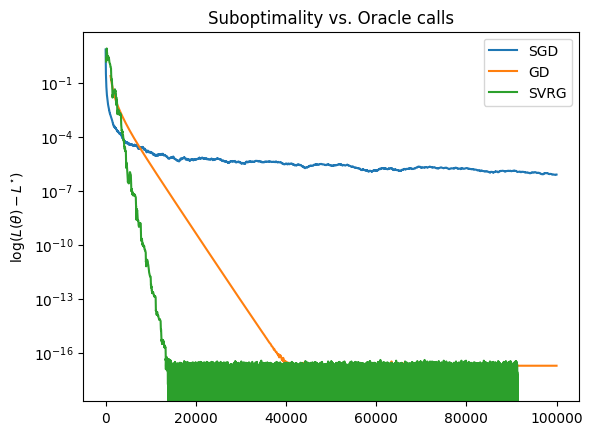

In [6]:
start = 10

print(len(Sgd_FOs), len(Sgdruns[0]))
plt.plot(Sgd_FOs[start:],Sgdruns[0][start:]-Loss_star, label = 'SGD')
plt.plot(Gd_FOs[start:],Gdruns[0][start:]-Loss_star, label = 'GD')
plt.plot(SVRG_FOs[start:],SVRGruns[0][start:]-Loss_star, label = 'SVRG')

plt.yscale('log')
plt.legend()
plt.title('Suboptimality vs. Oracle calls')
plt.ylabel('$\log(L(\\theta) - L^{\star})$')


100000 100000


Text(0, 0.5, '$\\log(L(\\theta) - L^{\\star})$')

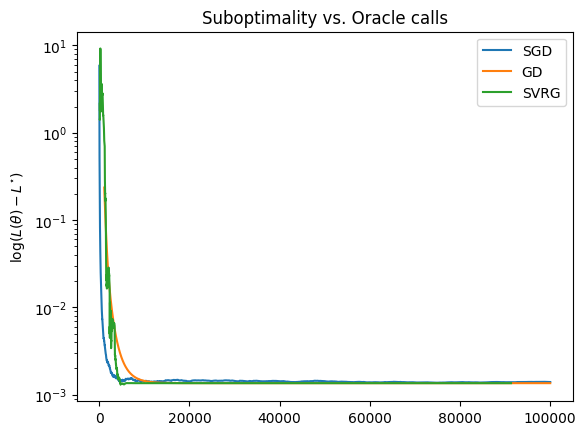

In [7]:
start = 10

Loss_star_test = Loss(theta_star,X_test, y_test, lambda_reg)

print(len(Sgd_FOs), len(Sgdruns[0]))
plt.plot(Sgd_FOs[start:],Sgdruns_test[0][start:]-Loss_star_test, label = 'SGD')
plt.plot(Gd_FOs[start:],Gdruns_test[0][start:]-Loss_star_test, label = 'GD')
plt.plot(SVRG_FOs[start:],SVRGruns_test[0][start:]-Loss_star_test, label = 'SVRG')

plt.yscale('log')
plt.legend()
plt.title('Suboptimality vs. Oracle calls')
plt.ylabel('$\log(L(\\theta) - L^{\star})$')
